<a href="https://colab.research.google.com/github/puneat/Algorithmic_Portfolio/blob/master/Portfolio_Investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [3]:
!pip install hmmlearn

     |████████████████████████████████| 368kB 8.4MB/s 


In [5]:
!pip3 install ta

  Created wheel for ta: filename=ta-0.5.25-cp36-none-any.whl size=24880 sha256=f131152456526fcb5b373c7d949da59a53ab47bee0de3d85d7d2b1fd66d423b8
  Stored in directory: /root/.cache/pip/wheels/2e/93/b7/cf649194508e53cee4145ffb949e9f26877a5a8dd12db9ed5b
Successfully built ta


In [104]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import statsmodels as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
import itertools

In [17]:
data = read_price_data(638)
data.head()

VRSK.US Equity


,open,high,low,close,volume,bb_live
date,,,,,,
2007-01-03,1.000000,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.982633,NaN,NaN,NaN,NaN,NaN
2007-01-05,0.973673,NaN,NaN,NaN,NaN,NaN
2007-01-08,0.959063,NaN,NaN,NaN,NaN,NaN
2007-01-09,0.974087,NaN,NaN,NaN,NaN,NaN


In [19]:
from hmmlearn.hmm import GaussianHMM
data = read_price_data(43)
returns = data.bb_live[:100].pct_change()
returns =np.column_stack(returns[1:])

returns

AMZN.US Equity


array([[ 0.00516793, -0.01362466, -0.0226739 ,  0.00746663, -0.01667553,
         0.0067295 ,  0.02139039,  0.0120419 , -0.0201759 , -0.02375922,
         0.00108158, -0.00189083, -0.01407302,  0.02278338, -0.00483092,
        -0.00620281,  0.01573947, -0.01015226,  0.01673416,  0.02734269,
        -0.03385012, -0.00615139,  0.02987085,  0.01855238,  0.00307847,
        -0.00971864,  0.00335744,  0.01184038,  0.02111423, -0.00199297,
         0.00673987,  0.02925866, -0.00602271, -0.0063015 , -0.00536583,
         0.00244979, -0.05014452,  0.00798352, -0.00740929, -0.02985846,
        -0.01698061,  0.04129557, -0.00570247, -0.0067779 ,  0.01942255,
        -0.00077239, -0.02550889,  0.00687467, -0.00787813,  0.00185285,
         0.01585205,  0.00338102,  0.03162262, -0.007789  , -0.01291464,
         0.00076962,  0.00922836, -0.00076194,  0.01194713, -0.0005024 ,
         0.01583312,  0.0190499 ,  0.00825457,  0.00361172, -0.00047986,
         0.00480088, -0.00430015,  0.01415549,  0.0

In [31]:
returns.shape

(2516, 1)

In [58]:
from hmmlearn.hmm import GaussianHMM
data = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/secondary_data.csv')
data['return'] = data['SPX Index'].pct_change()
data=data.dropna()
returns =np.vstack(data['return'])
hmm_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=5000).fit(returns)

In [59]:
print("Model Score:", hmm_model.score(returns))

Model Score: 6748.508002043049


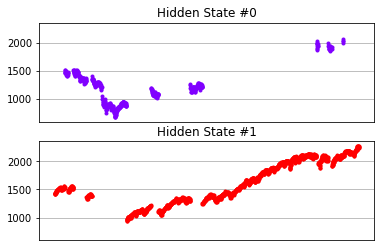

In [63]:
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import numpy as np
import pandas as pd
import seaborn as sns
# Predict the hidden states array
hidden_states = hmm_model.predict(returns)
# Create the correctly formatted plot
fig, axs = plt.subplots(hmm_model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, hmm_model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
  mask = hidden_states == i
  ax.plot_date(data.index[mask], data["SPX Index"][mask], ".", linestyle='none', c=colour)
  ax.set_title("Hidden State #%s" % i)
  ax.xaxis.set_major_locator(YearLocator())
  ax.xaxis.set_minor_locator(MonthLocator())
  ax.grid(True)
plt.show()

In [65]:
from sklearn.decomposition import PCA

In [66]:
def get_pf_covar_mtxs(self):
  pf_covar_mtxs=dict()

  for j in self.weights.column.levels[0]:
    for i in self.weights.columns.levels[1]:
      pf_vector = pd.dataFrame(self.portfolio_generation_mtx[j,i])
      pf_covar_mtxs[j,i] = pf_vector.dot(pf_vector.T)*self.investment_universe.covar_mtx

  return pf_covar_mtxs

self.covar_mtxs=get_pf_covar_mtxs(self)

def portfolio_eigenvalue_explained_variance(pf_covar_mtx):
  pca=PCA()
  return pca.fit(pf_covar_mtx).explained_variance_ratio_

def get_pf_eigenvalue_explvars(self):
  pf_eigenvalue_explvars = pd.DataFrame()
  for j in self.weights.column.levels[0]:
    for i in self.weights.columns.levels[1]:
      pf_vector = pd.dataFrame(data=portfolio_eigenvalue_explained_variance(self.covar_mtxs[j,i]),
                               index=pd.RangeIndex(1,len(self.covar_mtxs[j,i].index)+1),
                               columns=pd.MultiIndex.from_tuples([(j,i)],names=('NumOfPosn','SimID')))
      
      pf_eigenvalue_explvars = pd.concat([pf_vector,pf_eigenvalue_explvars],axis=1)

  return pf_eigenvalue_explvars

NameError: ignored

In [64]:
data = read_price_data(43)
logic = {'open'  : 'first',
         'high'  : 'max',
         'low'   : 'min',
         'close' : 'last',
         'volume': 'sum',
         'bb_live':'last'}

offset = pd.offsets.timedelta(days=-6)

#data = pd.read_clipboard(parse_dates=['date'], index_col=['date'])
data = data.resample('W', loffset=offset).apply(logic)
data.head()

AMZN.US Equity


,open,high,low,close,volume,bb_live
date,,,,,,
2007-01-01,1.000000,1.002048,0.988173,0.991473,25393717.0,0.991473
2007-01-08,1.007385,0.980799,0.974244,0.987080,29952875.0,0.987080
2007-01-15,1.017332,0.998464,0.961892,0.956589,25899684.0,0.956589
2007-01-22,1.081236,0.978751,0.954008,0.952196,29809161.0,0.952196
2007-01-29,1.112283,1.006144,0.960315,0.966150,71727278.0,0.966150


In [ ]:
data = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/bb_live.csv')
print(data.shape)
data=data.dropna(axis = 1, thresh=2518) 
print(data.shape)
data['date'] = pd.to_datetime(data['date'])
data=data.set_index('date')
data=data.pct_change()
data=data.dropna(axis = 0) 
print(data.shape)
data.head()

In [199]:
class InvestmentUniverse:
  def __init__(self,universe):
    self.universe = universe

    self.tickers = pd.DataFrame(data=universe.columns,
                                index=pd.RangeIndex(1,universe.T.count()[0]+1),
                                columns=['Ticker'])
    
    self.dates=pd.DataFrame(data=universe.index.values,
                            index=pd.RangeIndex(1,universe.count()[0]+1),
                            columns=['Date'])
    
    self.returns=universe

    self.expected_returns=pd.DataFrame(data=self.returns.mean(),
                                       columns=['ExpectedReturns'])
    
    self.variances=pd.DataFrame(data=self.returns.var(),
                                columns=['variance'])
    
    self.volatilities = pd.DataFrame(data=self.returns.std(),
                                     columns=['volatility'])
    self.correl_mtx = self.returns.corr()

    self.covar_mtx = self.returns.cov()

    self.covar_mtx_diag = pd.DataFrame(data=np.diag(self.returns.var()),
                                       index=self.tickers['Ticker'].values,
                                       columns=self.tickers['Ticker'].values)
    
    self.covar_mtx_offdiag = self.covar_mtx - self.covar_mtx_diag
    
    self.volsumprod_mtx = self.volatilities.dot(self.volatilities.T)

  def get_ticker_count(self):
    return self.tickers.count()[0]

  def get_date_count(self):
    return self.dates.count()[0]

In [263]:
import random
def portfolio_generator(investment_universe, position_list, number_of_simulations):
  blank_data_frame = pd.DataFrame()
  row_index = investment_universe.tickers.index
  columns = tuple(itertools.product(position_list,range(1,number_of_simulations+1)))
  row_index_names = investment_universe.tickers
  columns_names = ['NumOfPosn','SimID']
  a = np.zeros(shape=(investment_universe.get_ticker_count(),number_of_simulations))
  portfolio_generation_mtx = pd.DataFrame(data=a,index=row_index_names,columns=columns)
  # portfolio_generation_mtx = blank_data_frame(len(row_index),
  #                                             len(columns),
  #                                             row_index,
  #                                             columns,
  #                                             row_index_names,
  #                                             columns_names)
  
  for i in range(0,number_of_simulations,1):
    pf_sample = list(random.sample(list(row_index),50))
    for k in range(0,len(pf_sample)):
      portfolio_generation_mtx.iloc[pf_sample[k]-1,i] = 1

  portfolio_generation_mtx.index = investment_universe.tickers['Ticker']

  return portfolio_generation_mtx

In [264]:
class PortfolioUniverse:
  def __init__(self,investment_universe,position_list,number_of_sims):
    self.investment_universe = investment_universe
    self.position_list = position_list
    self.number_of_sims = number_of_sims
    self.portfolio_generation_mtxs = portfolio_generator(self.investment_universe,
                                                         self.position_list,
                                                         self.number_of_sims)
    
    def get_number_of_different_positions(self):
      return len(self.position_list)

    self.number_of_different_positions = get_number_of_different_positions(self)

    def get_number_of_portfolios(self):
      return self.number_of_different_positions*self.number_of_sims

    self.number_of_portfolios = get_number_of_portfolios(self)

    self.weights = self.portfolio_generation_mtxs/self.portfolio_generation_mtxs.sum()

    def get_pf_returns(self):
      a = np.zeros(shape=(self.investment_universe.get_date_count(),self.number_of_portfolios))
      pf_returns = pd.DataFrame(data=a,
                                index=self.investment_universe.dates['Date'].values,
                                columns=self.portfolio_generation_mtxs.columns)
      for k in range(0,self.investment_universe.get_date_count()):
        for i in range(0,number_of_sims):
          #print(j,i)
          pf_returns.iloc[k,i] = np.dot(self.weights.iloc[:,i],self.investment_universe.returns.iloc[k,:])
      return pf_returns

    self.returns = get_pf_returns(self)

In [265]:
num_sims = 100
positions_list=[50]
universe = InvestmentUniverse(data)
pf_universe = PortfolioUniverse(universe, positions_list, num_sims)
pf_universe.returns.describe()

50               ...                          
               1            2    ...          99           100
count  2523.000000  2523.000000  ...  2523.000000  2523.000000
mean      0.000545     0.000581  ...     0.000576     0.000637
std       0.016077     0.015066  ...     0.014958     0.014839
min      -0.102337    -0.096148  ...    -0.105326    -0.100465
25%      -0.006068    -0.005782  ...    -0.005442    -0.005676
50%       0.000920     0.000928  ...     0.001050     0.001119
75%       0.007820     0.007216  ...     0.007089     0.007532
max       0.123740     0.121178  ...     0.107031     0.108256

[8 rows x 100 columns]

In [7]:
def read_price_data(idx):
  open = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/open_price.csv')
  close = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/close_price.csv')
  high = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/high_price.csv')
  low = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/low_price.csv')
  bb_live = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/bb_live.csv')
  volume = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/volume.csv')
  print(close.columns[idx])

  open=open.iloc[:,[0,idx]]
  close=close.iloc[:,[0,idx]]
  high=high.iloc[:,[0,idx]]
  low=low.iloc[:,[0,idx]]
  bb_live=bb_live.iloc[:,[0,idx]]
  volume=volume.iloc[:,[0,idx]]

  open['date'] = pd.to_datetime(open['date'])
  open=open.set_index('date')

  close['date'] = pd.to_datetime(close['date'])
  close=close.set_index('date')

  high['date'] = pd.to_datetime(high['date'])
  high=high.set_index('date')

  low['date'] = pd.to_datetime(low['date'])  
  low=low.set_index('date')

  bb_live['date'] = pd.to_datetime(bb_live['date'])
  bb_live=bb_live.set_index('date')

  volume['date'] = pd.to_datetime(volume['date'])
  volume=volume.set_index('date')

  result = pd.concat([open,high,low,close,volume,bb_live], axis=1).reindex(open.index)
  result.columns = ['open','high','low','close','volume','bb_live']

  result['open'] =result['open'].apply(lambda x: x/result.open[0])
  result['close'] =result['close'].apply(lambda x: x/result.close[0])
  result['high'] =result['high'].apply(lambda x: x/result.high[0])
  result['low'] =result['low'].apply(lambda x: x/result.low[0])
  result['bb_live'] =result['bb_live'].apply(lambda x: x/result.bb_live[0])
  result['volume'] =result['volume'].apply(lambda x: x/result.volume[0])

  return result

def data_load(idx):
  prices = read_price_data(idx)
  tech_ind = add_all_ta_features(prices, open="open", high="high", low="low", close="close", volume="volume")
  secondary_index_data = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/secondary_data.csv')
  secondary_index_data=secondary_index_data.set_index('date')

  ind=pd.concat([tech_ind, secondary_index_data], axis=1).reindex(tech_ind.index)
  #ind=tech_ind
  ind=ind.dropna(axis=1,how='all',thresh=2000)
  ind=ind.dropna(axis=0)

  #equity=sp500_hist_data.iloc[:,[0,idx]]
  #missing_values = set(ind.iloc[:, 0]).symmetric_difference(set(equity.iloc[:, 0]))
  #missing_values=list(missing_values)
  #print(len(missing_values))
  #ind = ind[~ind['date'].isin(missing_values)]
  #equity = equity[~equity['date'].isin(missing_values)]
  X=ind.iloc[:,6:]
  y=ind.iloc[:,3]
  return X, y

def input_data(trainx,trainy,index):
  trainx=trainx.to_numpy()
  trainy=trainy.to_numpy()
  trainX, trainY = trainx[:index,:], trainy[:index]
  validX, validY = trainx[index:,:], trainy[index:]
  scaler = StandardScaler()
  trainX=scaler.fit_transform(trainX)
  validX=scaler.transform(validX)
  return trainX, trainY, validX, validY

def remove_features(trainX,trainY):
  corr_matrix=[]
  for idx in range(0,trainX.shape[1]): 
    corr=np.corrcoef(trainX.iloc[:,idx].to_numpy(),trainY.to_numpy())
    corr_matrix.append(corr[0,1]*100)
    idx_list=[]
  for i,val in enumerate(corr_matrix):
    if (val<=5 and val>=-5):
      idx_list.append(i)
    #elif (val>=98):
    #  idx_list.append(i)
  trainX=trainX.drop(columns=trainX.columns[idx_list])
  return trainX,trainY, corr_matrix

def sp500_returns():
  close = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/close_price.csv')
  close = close.set_index('date')
  #close = close.fillna(0)
  close = close.pct_change()[1:]
  #close = close.sort_values(by=list(close.columns),axis=0)
  return close    

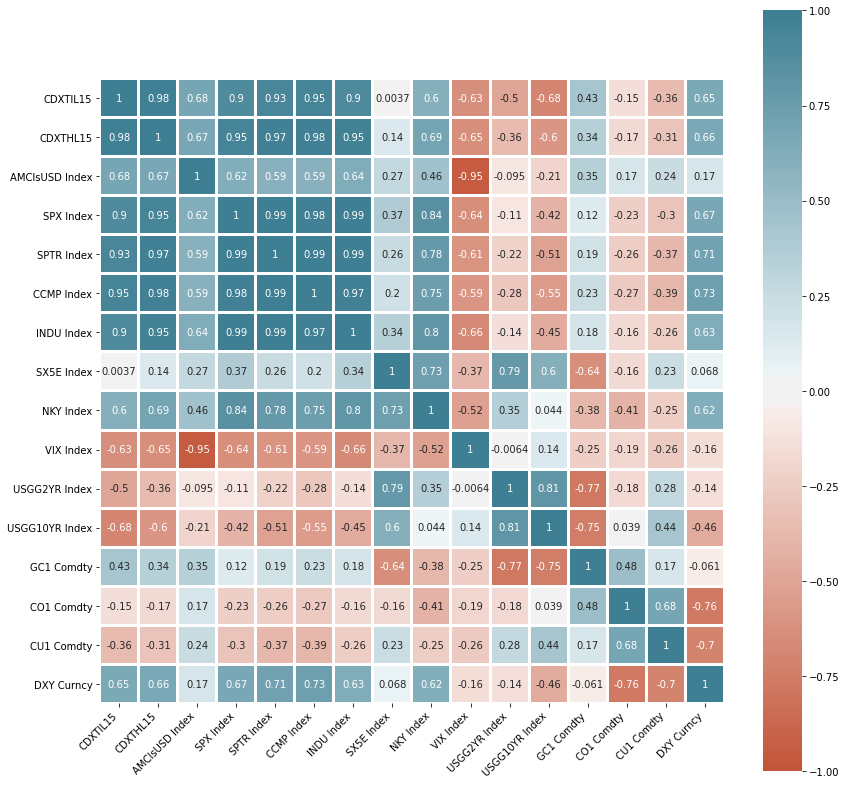

In [16]:
import seaborn as sns
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
fig, ax1 = plt.subplots(figsize=(14, 14))
data = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/secondary_data.csv')
data = data.set_index('date')
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidth=2,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# **Diversification**

In [ ]:
sp500_companies = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/company_data.csv')
sp500_companies.tail()

,tablerownames,ticker,company,constituentStart,constituentEnd,industryCode,industry
674,679,YHOO.US Equity,Yahoo! Inc,1999-12-07,2017-06-16,451010,Internet Software & Services
675,680,YUM.US Equity,Yum! Brands Inc.,1997-10-06,NaN,253010,"Hotels, Restaurants & Leisure"
676,681,ZBH.US Equity,Zimmer Biomet Holdings Inc,2001-08-06,NaN,351010,Health Care Equipment & Supplies
677,682,ZION.US Equity,Zions Bancorp,2001-06-22,NaN,401010,Commercial Banks
678,683,ZTS.US Equity,Zoetis Inc,2013-06-21,NaN,352020,Pharmaceuticals


In [ ]:
sp500_companies['company'].unique()

In [ ]:
print(sp500_companies['industry'].value_counts(normalize=True)[:30]*50)

Oil, Gas & Consumable Fuels                       2.724595
Equity Real Estate Investment Trusts (REITs)      2.430044
Health Care Providers & Services                  1.988218
Insurance                                         1.840943
Specialty Retail                                  1.840943
Health Care Equipment & Supplies                  1.767305
Capital Markets                                   1.767305
Commercial Banks                                  1.620029
Machinery                                         1.546392
IT Services                                       1.546392
Semiconductors & Semiconductor Equipment          1.546392
Media                                             1.472754
Energy Equipment & Services                       1.472754
Chemicals                                         1.399116
Food Products                                     1.178203
Pharmaceuticals                                   1.178203
Multi-Utilities                                   1.1782

An Equal weighted portfolio with 10 stocks, rebalanced each day with that days 10 highest returns generating stocks.

In [ ]:
secondary_index_data = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/secondary_data.csv')
secondary_index_data = secondary_index_data['SPX Index']
secondary_index_data=secondary_index_data.pct_change()
return_matrix = sp500_returns()
n_stocks=20
weights=[1/n_stocks]*n_stocks
cum_return=[]
for day in range(0, return_matrix.shape[0]):
  day_return=[]
  for comp in range(0, return_matrix.shape[1]):
    day_return.append(return_matrix.iloc[day,comp])
  day_return = [x for x in day_return if (str(x) != 'nan' and x<1)]
  day_return.sort(reverse=True)
  day_return=day_return[:n_stocks]
  res_list = [weights[i] * day_return[i] for i in range(len(day_return))]
  cum_return.append(sum(res_list))

matplotlib.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(16, 9))
ax2 = ax1.twinx()
ax1.plot(cum_return,color='red')
ax1.plot(secondary_index_data,color='blue',alpha=0.5)
ax1.legend(['Equal Weighted Portfolio Returns', 'S&P500 Index Returns'])  

In [ ]:
sp500_hist_data = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/close_price.csv')
sp500_companies = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/company_data.csv')
secondary_index_data = pd.read_csv('/gdrive/My Drive/UBS/S&P500/data/secondary_data.csv')

### **Support Vector Regression**

In [ ]:
tuned_parameters = [{'kernel': ['poly'], 'gamma': ['auto'],
                     'C': [1, 10, 100, 1000], 'degree':[1,2],'epsilon':[0.1],
                    'coef0':[1,2,3,4,5,6,7,8,9,10]}]
#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

score=['mean_squared_error']
ind, equity = data_load(300)
days=100
ind,equity,corr=remove_features(ind,equity)
trainX, trainY, validX, validY = input_data(ind,equity,days)
print(trainX.shape, trainY.shape, validX.shape, validY.shape)

model = GridSearchCV(
        SVR(), tuned_parameters
    )
model.fit(trainX, trainY)
#model = svr_poly.fit(trainX, trainY)
print(model.score(validX[:-1],validY[1:]))

(100, 70) (100,) (1775, 70) (1775,)
0.8951552030297335


In [ ]:
model.best_params_

{'C': 1000,
 'coef0': 10,
 'degree': 2,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'poly'}

In [ ]:
trainX[:-1].shape, trainY[1:].shape

((99, 70), (99,))

In [84]:
svr_poly = SVR(kernel='poly', C=250, gamma='auto', degree=1, epsilon=.1, coef0=10)
svr_linear = SVR(kernel='linear',C=100,epsilon=0.1)
ind, equity = data_load(100)
days=400
ind,equity,corr=remove_features(ind,equity)
trainX, trainY, validX, validY = input_data(ind,equity,days)
print(trainX.shape, validX.shape, trainY.shape, validY.shape)
model_p = svr_poly.fit(trainX, trainY)
model_l = svr_linear.fit(trainX, trainY,)
print(mean_absolute_error(validY[1:], model_p.predict(validX[:-1])), model_p.score(validX[:-1],validY[1:]))
#print(model_p.score(validX,validY),model_l.score(validX,validY))

BWA.US Equity
(400, 64) (1475, 64) (400,) (1475,)
0.14578636197537512 0.7167295066989658


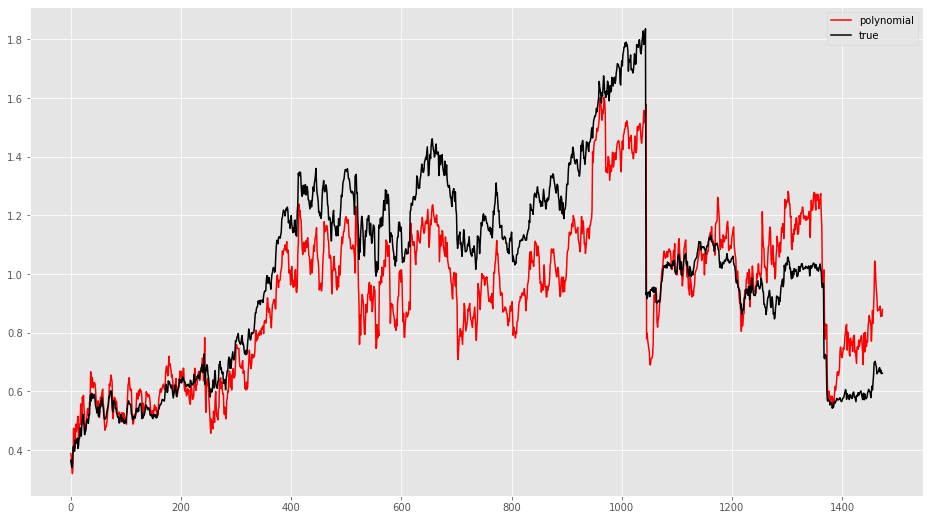

In [85]:
#ypred_stack = stack.predict(validX)
ypred_poly = model_p.predict(validX[:-1])
matplotlib.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(16, 9))
#ax2 = ax1.twinx()
# ax1.plot(ypred_stack,color='green')
ax1.plot(ypred_poly,color='red')
ax1.plot(validY[1:],color='black')
ax1.legend(['polynomial','true'])

### **LightGBM**

In [ ]:
#model parameters
param = {'num_leaves':300, 'objective':'mse','max_depth':20,'learning_rate':0.1,'max_bin':200, 'seed':15, 'verbose': -1}
param['metric'] = ['mse']

#model variables initialisation
model=None
evals_result = {} #store batch results
cum_results = {'training':[], 'valid_1':[]} #store all results

In [ ]:
#training loop
trainValidSplit = 0.75
roundPerBatch = 5000
#trainx=ind.to_numpy()
#trainy=equity.to_numpy()

In [ ]:
#training loop
#build training and validation gbm dataset objects
for i in range(43,44):
  ind, equity = data_load(i)
  newX,newY=remove_features(ind,equity)
  trainX, trainY, validX, validY = input_data(newX,newY)
  train_data = lgb.Dataset(trainX, label=trainY)
  validation_data = lgb.Dataset(validX,label=validY)
  #train model
  model = lgb.train(param, train_data, roundPerBatch,
                      valid_sets=[train_data, validation_data],
                      evals_result=evals_result,
                      verbose_eval=1,init_model=model)
  cum_results['training'] += (evals_result['training']['l2'])
  cum_results['valid_1'] += (evals_result['valid_1']['l2'])
  #if i != int((sp500_hist_data.shape[1]/2)-1):
   # del ind,equity,trainX, trainY, validX, validY,train_data,validation_data

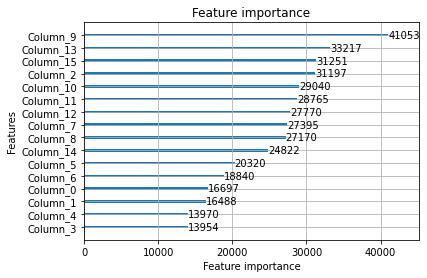

In [ ]:
lgb.plot_importance(model, max_num_features=16);

### **Quantile Regression**

In [ ]:
ind, equity = data_load(43)
ind,equity,corr=remove_features(ind,equity)
#ind.info()
trainX, trainY, validX, validY = input_data(ind,equity,500)
print(trainX.shape, trainY.shape, validX.shape, validY.shape)
mod = sm.regression.quantile_regression.QuantReg(trainY, trainX)
model = mod.fit(q=.5,kernel='gau')
print(model.summary())

/usr/local/lib/python3.6/dist-packages/ta/trend.py:608: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:612: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


(500, 23) (500,) (1375, 23) (1375,)
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               -5.755
Model:                       QuantReg   Bandwidth:                       1.784
Method:                 Least Squares   Sparsity:                   6.580e+291
Date:                Wed, 16 Sep 2020   No. Observations:                  500
Time:                        15:47:35   Df Residuals:                      477
                                        Df Model:                           23
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1244        nan        nan        nan         nan         nan
x2             6.3341        nan        nan        nan         nan         nan
x3             0.5473        nan        nan        nan         nan         nan
x4             0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:206: RuntimeWarning: overflow encountered in double_scalars
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


### **Support Vector Quantile Regression**

In [ ]:
!pip3 install liquidSVM

     |████████████████████████████████| 563kB 4.9MB/s 
  Created wheel for liquidSVM: filename=liquidSVM-1.0.1-cp36-cp36m-linux_x86_64.whl size=2578630 sha256=692a7a1a56bf1a14fc82451cd6020a20de808647eeee3d9b5f78701ff92f6644
  Stored in directory: /root/.cache/pip/wheels/85/3f/fc/daaad6cff352e71e2eab30b54adaec90108fc2908324c0511a
Successfully built liquidSVM


In [ ]:
from liquidSVM import LiquidData,qtSVM

In [ ]:
reg = LiquidData('reg-1d')
print(reg.train)

{'data': array([[0.28986675],
       [0.19561529],
       [0.23956186],
       ...,
       [0.90154848],
       [0.95844949],
       [1.06665809]]), 'target': array([0.42561854, 0.36602415, 0.33559088, ..., 0.44949226, 0.38824736,
       0.49917251]), 'DESCR': 'reg-1d (train)'}


In [ ]:
quantiles_list = [ 0.05, 0.1, 0.5, 0.9, 0.95 ]

ind, equity = data_load(43)
ind,equity,corr=remove_features(ind,equity)
trainX, trainY, validX, validY = input_data(ind,equity,500)
print(trainX.shape, trainY.shape, validX.shape, validY.shape)
print(data.shape)
model = qtSVM(reg.train, weights=quantiles_list,)

result, err = model.test(reg.test)
err[:,0]

/usr/local/lib/python3.6/dist-packages/ta/trend.py:608: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:612: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


(500, 70) (500,) (1375, 70) (1375,)


ValueError: ignored